# Mokelo-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'MKL'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [2]:
sql = """SELECT
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%MKL%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# Anzahl Scherben:
df.pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = sum, margins = True)  # Anzahl GE

Typ
MKL            64.0
MKL (?)        20.0
MKL/MTB (?)     1.0
All            85.0
Name: Anzahl, dtype: float64

In [3]:
# GE
df.loc[df['Anzahl'] == 1].pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)  # Anzahl GE

Typ
MKL            30.0
MKL (?)        18.0
MKL/MTB (?)     1.0
All            49.0
Name: objID, dtype: float64

In [4]:
# ausgezählte Scherben
df.loc[df['Anzahl'] != 1].pivot_table(values = 'Anzahl', index = 'Typ', aggfunc = sum, margins = True)  # Anzahl GE

Typ
MKL        34.0
MKL (?)     2.0
All        36.0
Name: Anzahl, dtype: float64

In [5]:
df_pivot = df.pivot_table(values = 'objID', index = 'Ort', columns = 'Typ', aggfunc = len)
df_pivot

Typ,MKL,MKL (?),MKL/MTB (?)
Ort,,,
Batanga (Fpl. 209),7.0,1.0,NaN
Bobulu (Fpl. 198),NaN,1.0,NaN
Dokeve 2 (Fpl. 224),1.0,NaN,NaN
Dongo (Fpl. 202),1.0,NaN,NaN
Kouango (Fpl. 229),NaN,2.0,NaN
Maoko (Fpl. 207),NaN,NaN,1.0
Mboko 1 (Fpl. 217),7.0,11.0,NaN
Mokelo (Fpl. 213),20.0,4.0,NaN
Mondoli (Fpl. 212),1.0,NaN,NaN


In [6]:
len(df_pivot.index)   # Anzahl der FdSt mit MKL-Keramik

10

## Technologische Merkmale (*fabrics*)

In [8]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%MKL%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [9]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


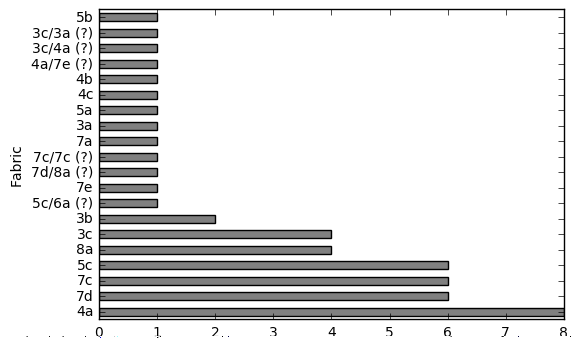

In [10]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [11]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
4a,8,16.326531
7d,6,12.244898
7c,6,12.244898
5c,6,12.244898
8a,4,8.163265


In [12]:
df.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)

MagerungDichte
             12
mittel       14
sehr viel     6
viel         14
wenig         3
Name: Anzahl, dtype: int64

In [12]:
df.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)

MagerungArt
                    12
Gl/Schamott          2
R/Bg                 1
S                   17
S/Gl                 8
S/Gl/Laterit         3
S/Laterit            3
S/Org + ???          1
S/Quarz/Gl           1
Schamott/laterit     1
Name: Anzahl, dtype: int64

### Brennfarbe

In [13]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%MKL%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,17,34.693878
Sonstig,29,59.183673
Weiß,3,6.122449


In [14]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [15]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

         36
s        29
g        18
bg       15
br       11
          9
bg bg     3
g s       2
bg s      2
 bg       2
dtype: int64

### Oberfläche der Scherben

In [16]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_name,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) = 'MKL'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric = True)
df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Obfl
außen glatt/innen rau     1
glatt                    23
leicht rau                1
rau                       1
Name: Anzahl, dtype: int64

## Gefäßformen

In [30]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKL%')
           AND ((t_Obj.Form_Gef) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# die Fragezeichen bei Gef-Form einfach löschen
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
# display(df.head())

> **ToDo**: über das löschen der Fragezeichen noch mal genau nachdenken!

In [31]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


Anzahl der Stücke, welche der 'Mokelo'-Gruppe zugewiesen werden könne und bei denen eine Gefäßeform ermittelt werden konnte:

In [32]:
df_pivot['objID'].sum()

33

Verteilung der Gefäßformen der 'Mokelo'-Gruppe:

In [33]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('../Mokelo-Gruppe\nGefäßformen')
# plt.savefig('output/figs/3-1-1-3_Mokelo-Gr_GefForm1.pdf')

> **Abb. #** Mokelo-Gruppe: Gefäßformen.

In [34]:
df_pivot = df.pivot_table(values = 'objID', index = 'ort_name', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

,objID
ort_name,
Batanga,3
Bobulu,1
Dokeve 2,1
Dongo,1
Mboko 1,8
Mokelo,17
Mondoli,1
Nzambi,1


In [49]:
# alles hinter der 1. Stelle abschneiden, um nur die Grundform zu haben
df['Form_Gef_GR'] = df['Form_Gef'].map(lambda x: str(x)[:1])

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef_GR', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID
Form_Gef_GR,
A,1
D,1
I,1
B,3
H,4
E,5
C,6
F,6
G,6


In [50]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.title('../Mokelo-Gruppe\nGefäßformen')
# plt.savefig('output/figs/3-1-1-3_Mokelo-Gr_GefForm1.pdf')

### Bauchform

In [84]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKL%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(''))

#display(df.head())

In [85]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,9,27.272727
D1,8,24.242424
A3,4,12.121212
D2,3,9.090909
A3 (?),2,6.060606
A1 (?),1,3.030303
A2,1,3.030303
B1,1,3.030303
D1/B1,1,3.030303


In [86]:
df_pivot.plot(y = 'Prozent', kind = 'barh', legend=False, color = 'grey')
plt.xlabel('Anteil [%]')
plt.ylabel('Gefäßbauch')
plt.show()

> **Mokelo-Gruppe** Gefäßbauch

### Korrelation Gef-Form & Bauchform

In [96]:
df = df.dropna(subset = ['Form_Gef'])
df['Form_Gef']= df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))

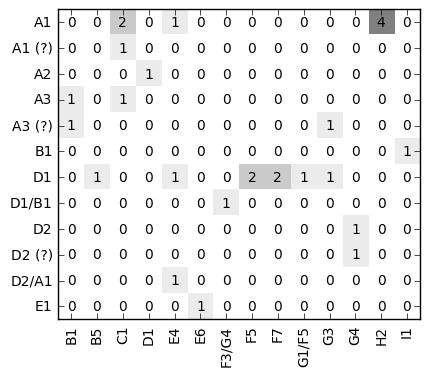

In [97]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

## Mündungs- & Randformen

In [101]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%MKL%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [102]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M1,14,48.275862
M4,4,13.793103
M2,3,10.344828
M6,2,6.896552
M1/M3,1,3.448276
M3,1,3.448276
M3/M 1,1,3.448276
M5,1,3.448276
M5/M1,1,3.448276


> **Tab. #** Mokelo-Gruppe: Mündungsformen

In [104]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

/home/dirk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1,9,29.032258
C3,4,12.903226
B1.1,3,9.677419
B2,3,9.677419
C1,3,9.677419
A1,2,6.451613
B2.1,2,6.451613
A2.3/B1,1,3.225806
A2.4,1,3.225806


> **Tab. #** Mokelo-Gruppe: Randformen

In [105]:
df_pivot['objID'].sum()   # Anzahl GE mit bestimmter Randform

31

In [106]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

12

In [107]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

### Bodenformen

In [143]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Boden
0,MKL,Mokelo,265,MKL,B4


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


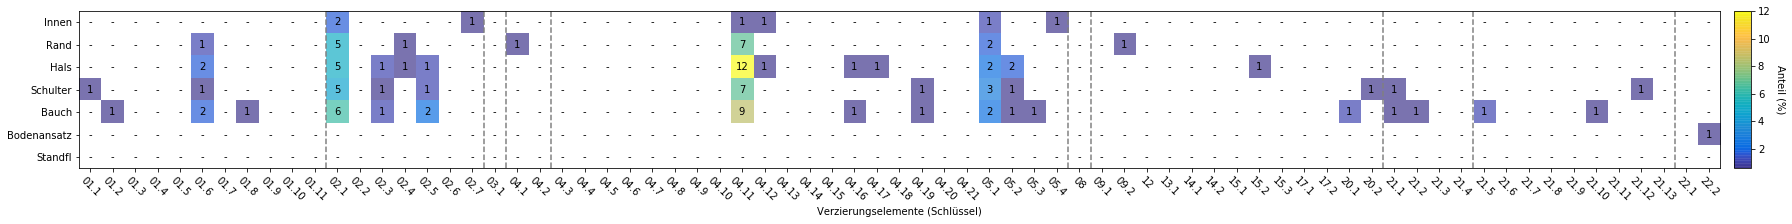

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-1-3_Mokelo_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [4]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzName_alt,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [5]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

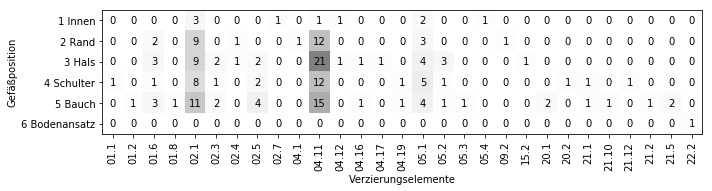

In [6]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/3-1-1-3_Mokelo_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [7]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


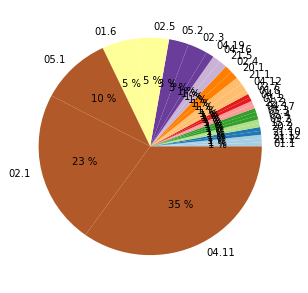

In [8]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [9]:
a = pd.Series({'Roulette-Verzierung':len(df.loc[df['verzName'].str.contains("21")].index),
               'Weitere Verzierungen':len(df.loc[~df['verzName'].str.contains("21")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Roulette-Verzierung,7,4.0
Weitere Verzierungen,168,96.0


In [10]:
# nur Roulette-Verzierungen herausfiltern

b = df.loc[df['verzName_alt'].str.contains("V08")]

c = pd.Series({'vegetabilisches Roulette':len(b.loc[df['verzName_alt'].str.contains("V08a")].index),
               'Schnitz-Roulette':len(b.loc[~df['verzName_alt'].str.contains("V08a")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
Schnitz-Roulette,7,70.0
vegetabilisches Roulette,3,30.0


In [11]:
df.loc[df['verzName'].str.contains("21")]

,objID,posID,verzID,pos,verzName,verzName_alt,verzBeschr,Typ,Form_Gef
6,265,6,41,4 Schulter,21.12,V08j,Schnitzroulette,MKL,B5
12,5573,7,76,5 Bauch,21.2,V08a1,Twisted String,MKL/MTB (?),None
20,5598,7,25,5 Bauch,21.5,V08c,Schnitzroulette,MKL,E4
82,5645,7,30,5 Bauch,21.10,V08h,Schnitzroulette,MKL (?),None
117,5876,6,23,4 Schulter,21.1,V08a,vegetabilisches Roulette/Knotted String,MKL,C1
119,5876,7,23,5 Bauch,21.1,V08a,vegetabilisches Roulette/Knotted String,MKL,C1
145,6031,7,25,5 Bauch,21.5,V08c,Schnitzroulette,MKL (?),None


In [12]:
# Eindruckverzierungen

q = ['04', '05']

a = pd.Series({'Eindrücke':len(df.loc[df['verzName'].str.contains('|'.join(q))].index),
               'Weitere Verzierungen':len(df.loc[~df['verzName'].str.contains('|'.join(q))].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Eindrücke,94,53.714286
Weitere Verzierungen,81,46.285714


In [15]:
df.loc[df['pos'].str.contains("Boden")]

,objID,posID,verzID,pos,verzName,verzName_alt,verzBeschr,Typ,Form_Gef
13,5573,9,98,6 Bodenansatz,22.2,VO2,aufgeraute Oberfläche,MKL/MTB (?),None


## Verbreitung

In [141]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
1,Bobulu (Fpl. 198),198,18.042886,1.441145,MKL (?)
2,Dongo (Fpl. 202),202,18.404747,2.721870,MKL
6,Nzambi (Fpl. 205),205,18.637255,3.161920,MKL
5,Maoko (Fpl. 207),207,18.642191,3.407332,MKL (?)
0,Batanga (Fpl. 209),209,18.594438,3.710706,MKL
5,Mondoli (Fpl. 212),212,18.641746,3.977498,MKL
4,Mokelo (Fpl. 213),213,18.638442,4.063908,MKL
3,Mboko 1 (Fpl. 217),217,18.690290,4.367518,MKL
1,Dokeve 2 (Fpl. 224),224,19.523072,5.131210,MKL
4,Kouango (Fpl. 229),229,19.976358,4.990322,MKL (?)


In [142]:
df.to_csv("../data/processed/3-1-1-3_MKL_Verbreitung.csv", index = False)

## Anhang

## Tafel-Abbildungen

In [36]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,16,3,BAT,85/101,NaN,34,MKL,F5,None,None
1,16,4,BAT,85/101,8,"2, 8",MKL,None,C1/C3,None
2,16,5,BAT,85/101,NaN,27,MKL,C1 (?),None,None
3,17,4,MND,85/101,NaN,"33, 45, 49, 56, 57",MKL,F7,C1,None
4,17,13,MKL,85/101,NaN,112,MKL,E4,B1,None
5,17,14,MKL,85/101,106,"63, 92, 93, 96, 100, 102, 106",MKL,F5 (?),B1,None
6,18,1,MKL,85/101,NaN,75,MKL,F7 (?),C1,None
7,18,2,MKL,85/101,NaN,113,MKL,C1 (?),B1,None
8,18,3,MKL,85/101,NaN,114,MKL,B5,C3,B4
9,18,4,MKL,85/101,NaN,111,MKL,E4,B1,None
